In [2]:
%matplotlib inline  
import numpy as np
import h5py
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 14, 'xtick.top': True, 'ytick.right': True, 'xtick.direction': 'in', 'ytick.direction': 'in'})

In [3]:
# def wideMH():
#     fields = []
#     fields = fields + range(650, 500,-50)
#     fields = fields + range(500,20,-10)
#     fields = fields + dnp.arange(20,-20,-0.2).tolist()
#     fields = fields + dnp.arange(-20,-500.1,-10).tolist()
#     fields = fields + range(-500, -650,-50)

#     pos pol pc
#     scan vmag tuple(fields) refl 0.1
#     scan vmag tuple(fields[::-1]) refl 0.1
#     pos vmag 0
#     pos pol nc
#     scan vmag tuple(fields) refl 0.1
#     scan vmag tuple(fields[::-1]) refl 0.1
#     pos vmag 0

In [4]:
def loadMH(scanID, gradient=0):
    f = h5py.File(directory+"/i10-%06d.nxs" % scanID, 'r')
    grp = f['entry1']['instrument']
    signal = grp['refl']['refl'][:] / grp['macr16']['data'][:]
    field = grp['vmag']['field'][:]
    f.close()
    
    f = h5py.File(directory+"/i10-%06d.nxs" % (scanID+1), 'r')
    grp = f['entry1']['instrument']
    signal = np.append(signal, grp['refl']['refl'][:] / grp['macr16']['data'][:])
    field = np.append(field, grp['vmag']['field'][:])
    
    # subtract a gradient to take account of drift over time
    x = np.arange(len(signal))
    signal = signal - gradient*x
    
    # normalize
    signal = signal - np.mean(signal)
    signal = signal / np.max(signal)
    
    return {'field':field, 'sig':signal}


In [5]:
directory="./example_data/mh_data"

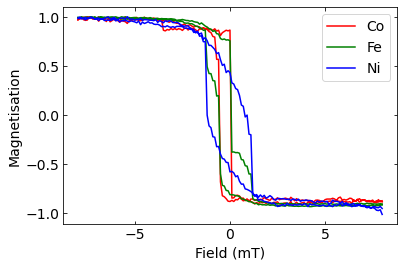

In [17]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4), facecolor='w')

d = loadMH(585456, 5e-19)
plt.plot(d['field'], d['sig'], 'r', label='Co')
d = loadMH(585454)
plt.plot(d['field'], d['sig'], 'g', label='Fe')
d = loadMH(585458, 5e-19)
plt.plot(d['field'], d['sig'], 'b', label='Ni')

plt.legend()
plt.xlabel("Field (mT)")
plt.ylabel("Magnetisation")

plt.show()